In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
# TODO: Remove

In [2]:
# TODO: Change back to original and fix reading if it hasn't been updated online
df = pd.read_csv("project_data_changed.csv", sep=";")

# Exploratory Data Analysis

In [3]:
df.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
# TODO: remove ?
# Test dropping
#df.drop(['X01', 'X02'], axis=1)
#df = df[["X02", "X03", "X04", "X05", "Y"]]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
X01    1000 non-null object
X02    1000 non-null int64
X03    1000 non-null object
X04    1000 non-null object
X05    1000 non-null int64
X06    1000 non-null object
X07    1000 non-null object
X08    1000 non-null int64
X09    1000 non-null object
X10    1000 non-null object
X11    1000 non-null int64
X12    1000 non-null object
X13    1000 non-null int64
X14    1000 non-null object
X15    1000 non-null object
X16    1000 non-null int64
X17    1000 non-null object
X18    1000 non-null int64
X19    1000 non-null object
X20    1000 non-null object
Y      1000 non-null int64
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


#### Numerical data distribution

In [6]:
df_num = df.select_dtypes(include = ['int64'])
df_num.head()

,X02,X05,X08,X11,X13,X16,X18,Y
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,2
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,2


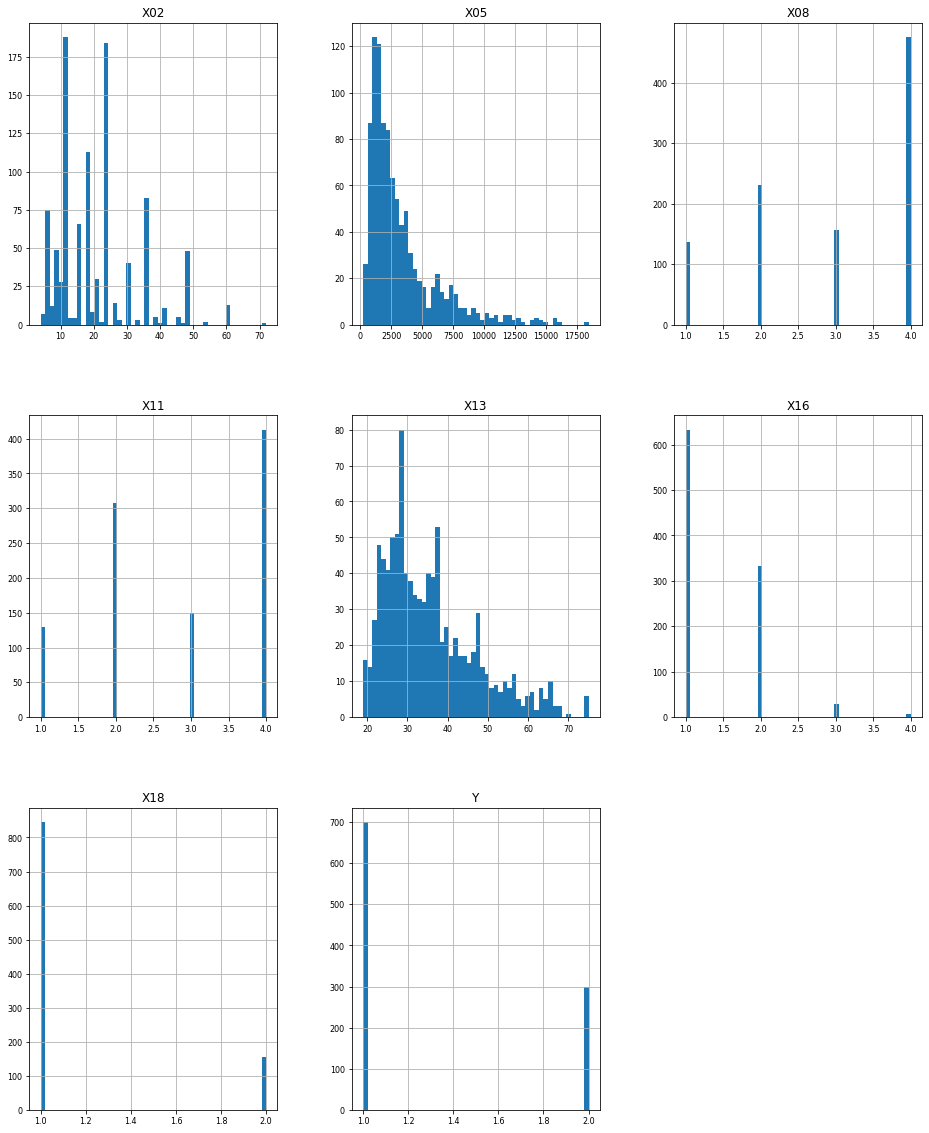

In [7]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

X05 and X13 seems to share a similar distribution

#### Correlation

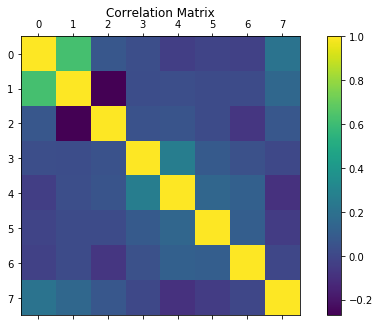

In [8]:
f = plt.figure(figsize=(10, 5))
plt.matshow(df_num.corr(), fignum=f.number)
cb = plt.colorbar()
plt.title('Correlation Matrix');

In [9]:
df_num_corr = df_num.corr()['Y']
features_list = df_num_corr.sort_values(ascending=False)
print("Correlated values with Y:\n{}".format(features_list))

Correlated values with Y:
Y      1.000000
X02    0.214927
X05    0.154739
X08    0.072404
X11    0.002967
X18   -0.003015
X16   -0.045732
X13   -0.091127
Name: Y, dtype: float64


In [10]:
from sklearn import preprocessing

In [11]:
le = preprocessing.LabelEncoder()

In [12]:
df

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


## Normalize

In [13]:
df_num.columns

Index(['X02', 'X05', 'X08', 'X11', 'X13', 'X16', 'X18', 'Y'], dtype='object')

In [14]:
num_cols = df_num.columns[:-1]
num_cols

Index(['X02', 'X05', 'X08', 'X11', 'X13', 'X16', 'X18'], dtype='object')

In [15]:
df_normalized = df.copy()
df_normalized[num_cols] = df_normalized[num_cols].apply(preprocessing.scale)

## Encode objects

In [16]:
df_obj_column_names = df.select_dtypes(include = ['O']).columns
df_obj_column_names

Index(['X01', 'X03', 'X04', 'X06', 'X07', 'X09', 'X10', 'X12', 'X14', 'X15',
       'X17', 'X19', 'X20'],
      dtype='object')

In [17]:
df_encoded = df_normalized.copy()
df_encoded[df_obj_column_names] = df_encoded[df_obj_column_names].apply(preprocessing.LabelEncoder().fit_transform)

In [18]:
df_encoded.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,0,-1.236478,4,4,-0.745131,4,4,0.918477,2,0,...,0,2.766456,2,1,1.027079,2,-0.428290,1,0,1
1,1,2.248194,2,4,0.949817,0,2,-0.870183,1,0,...,0,-1.191404,2,1,-0.704926,2,-0.428290,0,0,2
2,3,-0.738668,4,7,-0.416562,0,3,-0.870183,2,0,...,0,1.183312,2,1,-0.704926,1,2.334869,0,0,1
3,0,1.750384,2,3,1.634247,0,3,-0.870183,2,2,...,1,0.831502,2,2,-0.704926,2,2.334869,0,0,1
4,0,0.256953,3,0,0.566664,0,2,0.024147,2,0,...,3,1.535122,2,2,1.027079,2,2.334869,0,0,2


# Classification

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df_encoded.drop('Y',axis=1)
y = df_encoded['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn.svm import SVC
model = SVC(probability=True)
model.fit(X_train,y_train)

SVC(probability=True)

In [22]:
model.score(X_test, y_test)

0.74

# Cross-validation

In [23]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [24]:
cvr = cross_val_score(model, X, y, cv=10)
cvr.mean(), cvr.std()

(0.758, 0.03515679166249389)

# Prediction

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
pred = model.predict(X_test)

In [27]:
conf_matrix = confusion_matrix(y_test, pred)
conf_matrix

array([[188,  21],
       [ 57,  34]])

In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.77      0.90      0.83       209
           2       0.62      0.37      0.47        91

    accuracy                           0.74       300
   macro avg       0.69      0.64      0.65       300
weighted avg       0.72      0.74      0.72       300



### We want the bad customer class (2) recall to be close to 100%, because it is far worse if a bad customer is classified as good, as opposed to a good customer being classified as bad

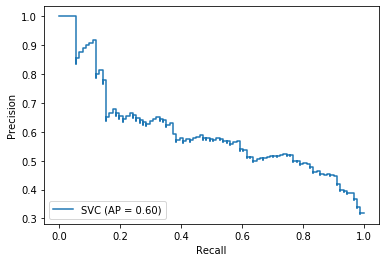

In [29]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model, X_test, y_test);

# Grid search
We are going to optimize for recall with grid search

In [30]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
def plot_compare(new_model, original=model):
    _, ax = plt.subplots(1,2, figsize=(10,5))    
    plot_precision_recall_curve(original, X_test, y_test, name="Original", ax=ax[0]);
    ax[0].set_title("Original")
    plot_precision_recall_curve(new_model, X_test, y_test, name="New", ax=ax[1]);
    ax[1].set_title("New")

def conf_matrix(m): 
    pred = m.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

In [31]:
param_grid = {'C': [0.001,0.01, 0.1, 0.5, 1, 10, 100], 'gamma': ['auto', 'scale']}

In [32]:
from sklearn.metrics import recall_score, make_scorer
custom_scorer = make_scorer(recall_score, greater_is_better=True,  pos_label=2, average = 'binary')
n_model = SVC(probability=True)
random_search = GridSearchCV(n_model, param_grid, n_jobs=-1, verbose = 1, scoring=custom_scorer)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.5s finished


GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
                         'gamma': ['auto', 'scale']},
             scoring=make_scorer(recall_score, pos_label=2, average=binary),
             verbose=1)

In [33]:
#pd.DataFrame(random_search.cv_results_)

In [34]:
random_search.score(X_test, y_test)

0.5494505494505495

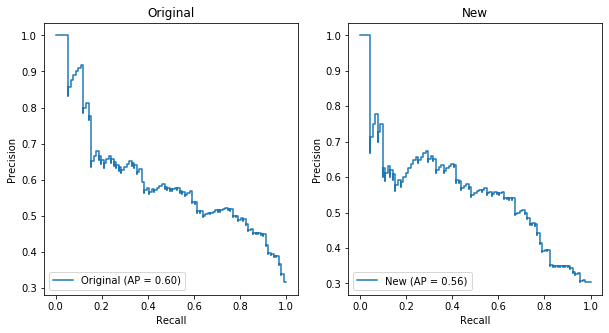

In [35]:
plot_compare(random_search, model)

In [36]:
conf_matrix(model)

[[188  21]
 [ 57  34]]
              precision    recall  f1-score   support

           1       0.77      0.90      0.83       209
           2       0.62      0.37      0.47        91

    accuracy                           0.74       300
   macro avg       0.69      0.64      0.65       300
weighted avg       0.72      0.74      0.72       300



In [37]:
conf_matrix(random_search)

[[171  38]
 [ 41  50]]
              precision    recall  f1-score   support

           1       0.81      0.82      0.81       209
           2       0.57      0.55      0.56        91

    accuracy                           0.74       300
   macro avg       0.69      0.68      0.69       300
weighted avg       0.73      0.74      0.74       300



#### We can go even further by manually setting a threshold

In [38]:
# https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
# TODO: refs
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
def adjus_classes(y_prob, t):
    return [1 if y >= t else 2 for y in y_prob]

#### Because it is five times worse to classify customers as good when they are bad than it is to classify customers bad when they are good we will set the threshold higher (to 0.8) for the good customer class 

In [39]:
from sklearn.metrics import accuracy_score

pred_original = random_search.predict(X_test)
y_scores = random_search.predict_proba(X_test)[:, 0]

pred_adjusted = adjus_classes(y_scores, 0.8)
#p, r, _ = precision_recall_curve(y_test, y_scores, pos_label=1)
print(confusion_matrix(y_test, pred_adjusted))
print(classification_report(y_test, pred_adjusted))

accuracy_score(y_test, pred_adjusted)

[[ 64 145]
 [ 14  77]]
              precision    recall  f1-score   support

           1       0.82      0.31      0.45       209
           2       0.35      0.85      0.49        91

    accuracy                           0.47       300
   macro avg       0.58      0.58      0.47       300
weighted avg       0.68      0.47      0.46       300



0.47

#### We did lose a lot on accuracy, however we managed to get a better recall

# Dimensionality reduction with PCA
TODO: remove?

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X)

In [42]:
reduced = pca.fit_transform(X)

In [44]:
principalDf = pd.DataFrame(reduced, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

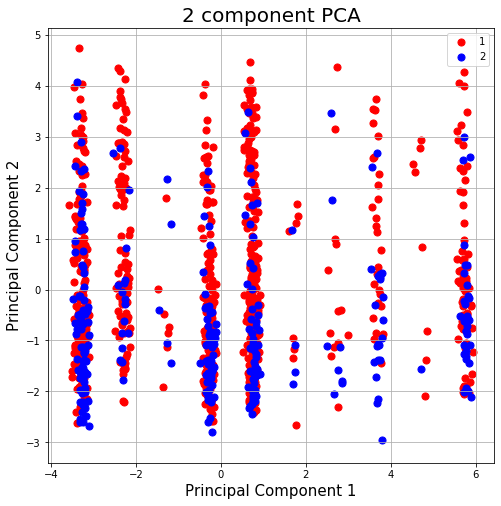

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Speed up training
TODO: Remove?

In [47]:
pca = PCA(.95)

In [48]:
pca.fit(X_train)

PCA(n_components=0.95)

In [49]:
pca.n_components_

15

In [50]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [51]:
custom_scorer = make_scorer(recall_score, greater_is_better=True,  pos_label=2, average = 'binary')
n_model = SVC(probability=True)
random_search = GridSearchCV(n_model, param_grid, n_jobs=-1, verbose = 1, scoring=custom_scorer)
random_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 out of  70 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.5s finished


GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
                         'gamma': ['auto', 'scale']},
             scoring=make_scorer(recall_score, pos_label=2, average=binary),
             verbose=1)

In [52]:
random_search.score(X_test_pca, y_test)

0.5494505494505495

In [53]:
pred_original = random_search.predict(X_test_pca)
y_scores = random_search.predict_proba(X_test_pca)[:, 0]

pred_adjusted = adjus_classes(y_scores, 0.8)
#p, r, _ = precision_recall_curve(y_test, y_scores, pos_label=1)
print(confusion_matrix(y_test, pred_adjusted))
print(classification_report(y_test, pred_adjusted))

accuracy_score(y_test, pred_adjusted)

[[ 66 143]
 [  8  83]]
              precision    recall  f1-score   support

           1       0.89      0.32      0.47       209
           2       0.37      0.91      0.52        91

    accuracy                           0.50       300
   macro avg       0.63      0.61      0.50       300
weighted avg       0.73      0.50      0.48       300



0.49666666666666665

# Clustering

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors=1)

In [66]:
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=1)

In [67]:
pred = knn.predict(X_test_pca)

In [68]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[170  39]
 [ 57  34]]
              precision    recall  f1-score   support

           1       0.75      0.81      0.78       209
           2       0.47      0.37      0.41        91

    accuracy                           0.68       300
   macro avg       0.61      0.59      0.60       300
weighted avg       0.66      0.68      0.67       300



In [69]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_pca,y_train)
    pred_i = knn.predict(X_test_pca)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

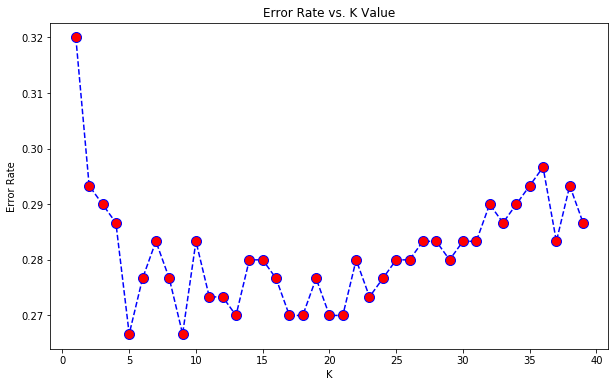

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [71]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_pca,y_train)
pred = knn.predict(X_test_pca)

print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[188  21]
 [ 59  32]]


              precision    recall  f1-score   support

           1       0.76      0.90      0.82       209
           2       0.60      0.35      0.44        91

    accuracy                           0.73       300
   macro avg       0.68      0.63      0.63       300
weighted avg       0.71      0.73      0.71       300



### KNN with PCA

In [73]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [74]:
principalDf = pd.DataFrame(reduced, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Y
0,0.547284,3.110124,1
1,0.841224,-1.686787,2
2,3.604784,0.106690,1
3,-0.373547,-0.891484,1
4,-3.430227,-0.658914,2


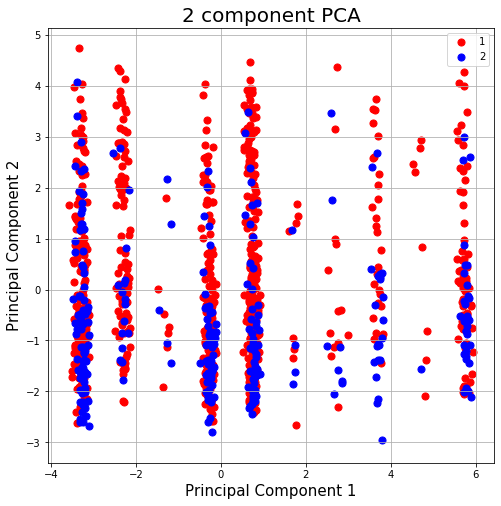

In [75]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Text(0.5, 1.0, 'PCA KNN, KNN (k=20)\nTest accuracy = 0.68')

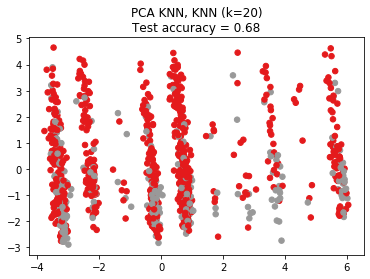

In [132]:
n_classes = len(np.unique(y_train))
n_neighbors = 20

# Reduce dimension to 2 with PCA
pca = PCA(n_components=2)

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

plt.figure()
# plt.subplot(1, 3, i + 1, aspect=1)

# Fit the method's model
pca.fit(X_train, y_train)

# Fit a nearest neighbor classifier on the embedded training set
knn.fit(pca.transform(X_train), y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(pca.transform(X_test), y_test)

# Embed the data set in 2 dimensions using the fitted model
X_embedded = pca.transform(X)

# Plot the projected points and show the evaluation score
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format("PCA KNN",
                                                          n_neighbors,
                                                          acc_knn))

In [133]:
h = .01  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [134]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

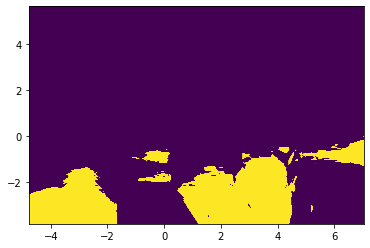

In [135]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, alpha=.8)

(-3.8245547288786135, 5.645445271121185)

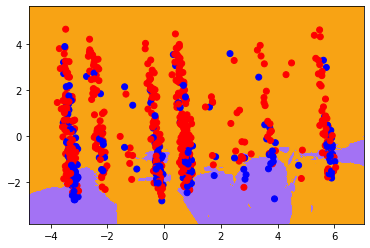

In [136]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#f8a314', '#a372f4'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8)

# Plot also the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## Clustering

In [143]:
from sklearn.cluster import KMeans

In [144]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

In [179]:
cluster_num = 12
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=cluster_num, n_init=10)
kmeans.fit(reduced_data)

KMeans(n_clusters=12)

([], <a list of 0 Text yticklabel objects>)

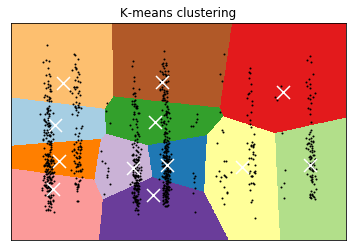

In [180]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

Text(0, 0.5, 'Distortion')

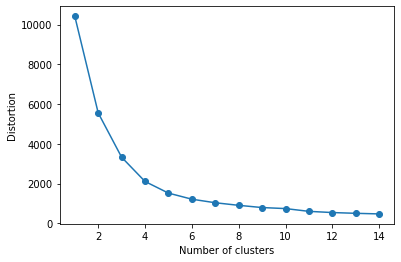

In [178]:
distortions = []
for i in range(1, 15):
    km = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 300,
    tol = 1e-04, random_state = 0)
    km.fit(reduced_data)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

## Different clustering algos

DBSCAN

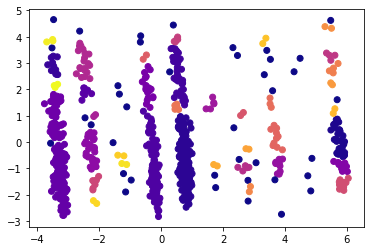

In [211]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.23, min_samples = 2)
y_dbscan = dbscan.fit_predict(X_train_pca)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_dbscan, cmap = "plasma")

AgglomerativeClustering

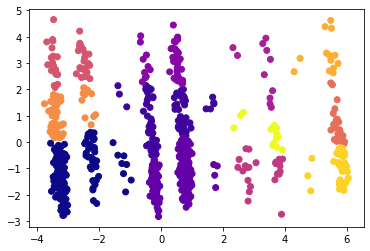

In [213]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 12, affinity = 'euclidean', linkage ='complete')
y_hc = hc.fit_predict(X_train_pca)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_hc, cmap = "plasma")

## using the dendrogram to find the optimal numbers of clusters.

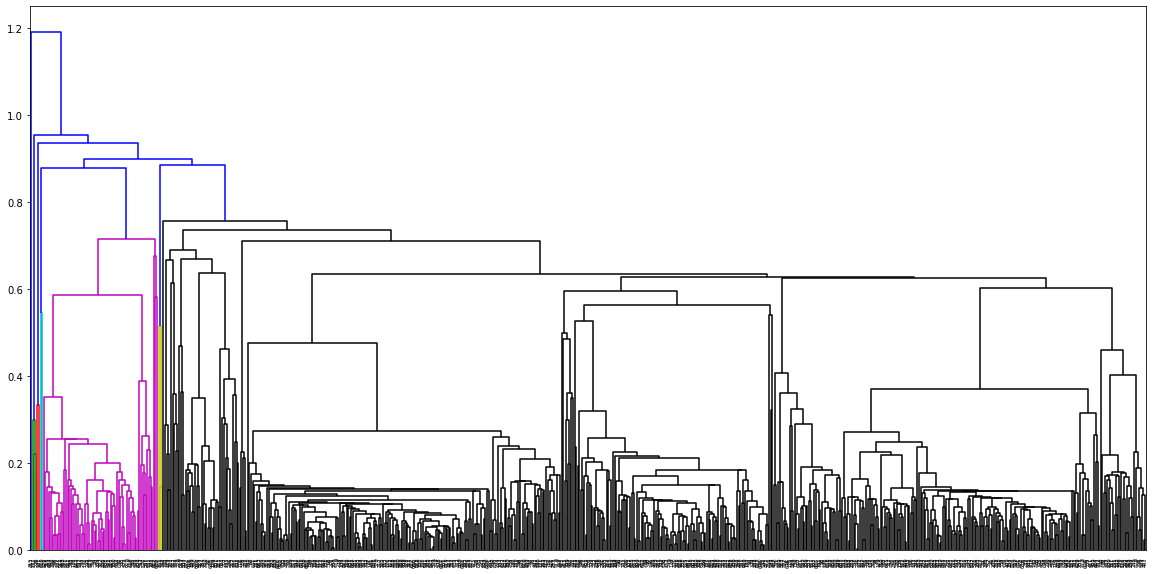

In [196]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X_train_pca, method= "single"))

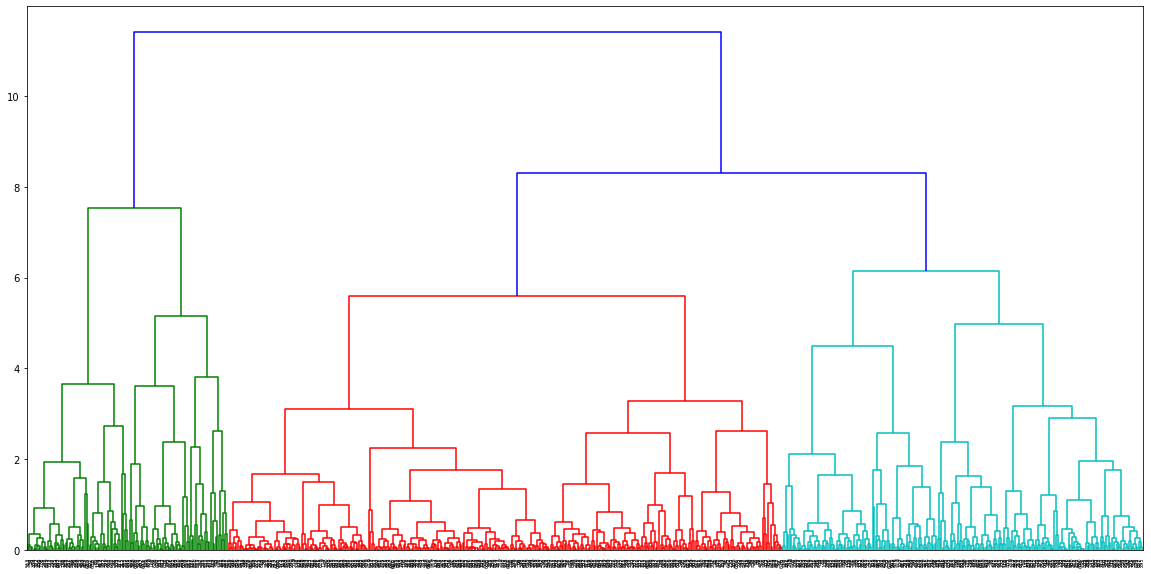

In [195]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X_train_pca, method = "complete"))

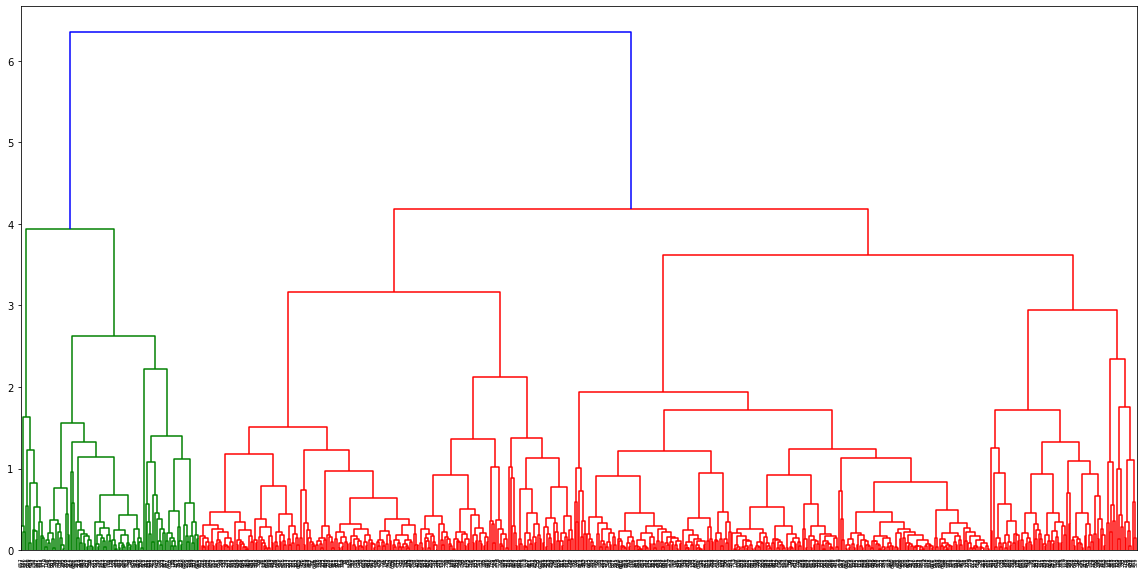

In [197]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X_train_pca, method = "average"))

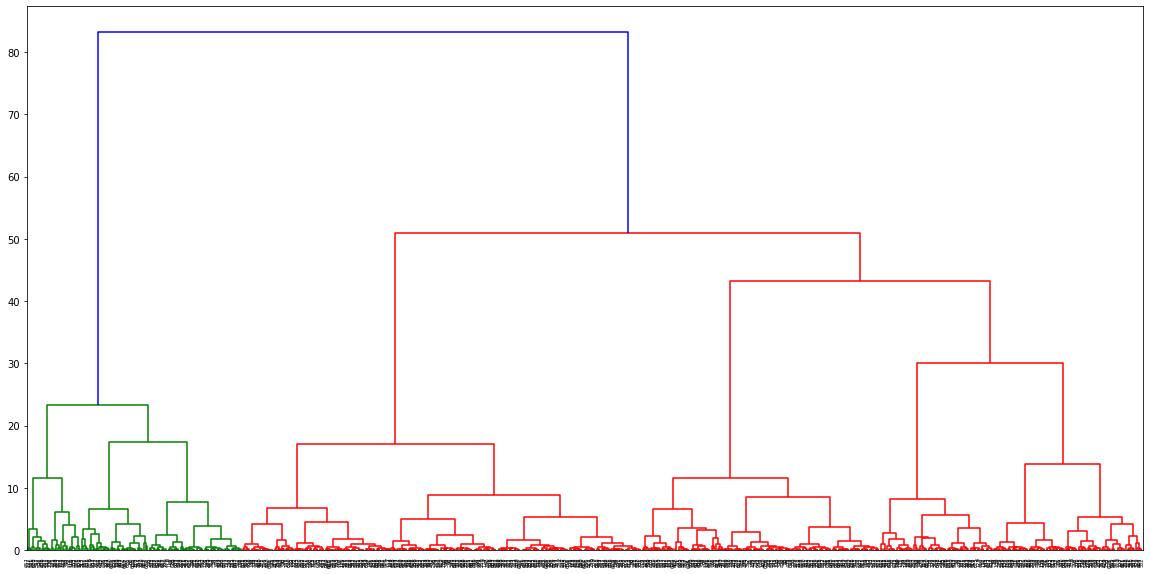

In [198]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X_train_pca, method = "ward"))

## Search

Text(0, 0.5, 'Distortion')

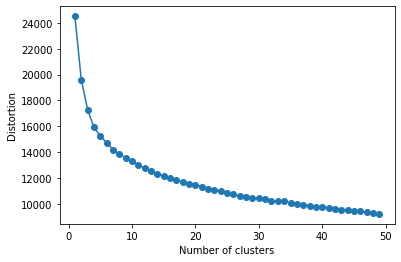

In [175]:
kmeans = KMeans(n_clusters=cluster_num, n_init=10)
kmeans.fit(X)
distortions = []
for i in range(1, 50):
    km = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 300,
    tol = 1e-04, random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 50), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')